In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

In [2]:
visit = pd.read_csv('sample.csv')

In [4]:
visit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61462 entries, 0 to 61461
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   spend per visit   61462 non-null  float64
 1   nights per visit  61462 non-null  float64
 2   quarter           61462 non-null  object 
 3   dur_stay          61462 non-null  object 
 4   mode              61462 non-null  object 
 5   purpose           61462 non-null  object 
dtypes: float64(2), object(4)
memory usage: 2.8+ MB


In [5]:
visit.head()

,spend per visit,nights per visit,quarter,dur_stay,mode,purpose
0,271.3012,1.9468,January-March,1-3 nights,Air,Holiday
1,258.4574,1.3577,January-March,1-3 nights,Air,Business
2,102.4110,2.4546,January-March,1-3 nights,Air,VFR
3,62.0001,1.0000,January-March,1-3 nights,Air,Miscellaneous
4,10.1834,1.0010,January-March,1-3 nights,Sea,Business


In [18]:
visit_numeric = pd.get_dummies(visit)

In [23]:
visit_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61462 entries, 0 to 61461
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   spend per visit           61462 non-null  float64
 1   nights per visit          61462 non-null  float64
 2   quarter_April-June        61462 non-null  uint8  
 3   quarter_January-March     61462 non-null  uint8  
 4   quarter_July-September    61462 non-null  uint8  
 5   quarter_October-December  61462 non-null  uint8  
 6   dur_stay_1-3  nights      61462 non-null  uint8  
 7   dur_stay_15+  nights      61462 non-null  uint8  
 8   dur_stay_4-7  nights      61462 non-null  uint8  
 9   dur_stay_8-14 nights      61462 non-null  uint8  
 10  mode_Air                  61462 non-null  uint8  
 11  mode_Sea                  61462 non-null  uint8  
 12  mode_Tunnel               61462 non-null  uint8  
 13  purpose_Business          61462 non-null  uint8  
 14  purpos

In [21]:
visit_numeric.sample(5)

,spend per visit,nights per visit,quarter_April-June,quarter_January-March,quarter_July-September,quarter_October-December,dur_stay_1-3 nights,dur_stay_15+ nights,dur_stay_4-7 nights,dur_stay_8-14 nights,mode_Air,mode_Sea,mode_Tunnel,purpose_Business,purpose_Holiday,purpose_Miscellaneous,purpose_Study,purpose_VFR
29504,514.9963,4.2595,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0
54738,"2,759.7664",1.1319,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0
22423,255.5206,3.8453,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0
23547,568.2494,4.1620,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0
50184,"1,185.5061",5.9094,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0


In [24]:
visit_final = visit_numeric.drop(['quarter_October-December', 'dur_stay_15+  nights', 'mode_Sea', 'purpose_Miscellaneous'], axis=1)

# double check the result
visit_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61462 entries, 0 to 61461
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   spend per visit         61462 non-null  float64
 1   nights per visit        61462 non-null  float64
 2   quarter_April-June      61462 non-null  uint8  
 3   quarter_January-March   61462 non-null  uint8  
 4   quarter_July-September  61462 non-null  uint8  
 5   dur_stay_1-3  nights    61462 non-null  uint8  
 6   dur_stay_4-7  nights    61462 non-null  uint8  
 7   dur_stay_8-14 nights    61462 non-null  uint8  
 8   mode_Air                61462 non-null  uint8  
 9   mode_Tunnel             61462 non-null  uint8  
 10  purpose_Business        61462 non-null  uint8  
 11  purpose_Holiday         61462 non-null  uint8  
 12  purpose_Study           61462 non-null  uint8  
 13  purpose_VFR             61462 non-null  uint8  
dtypes: float64(2), uint8(12)
memory usage:

Text(0.5, 1.0, 'Correlation Matrix')

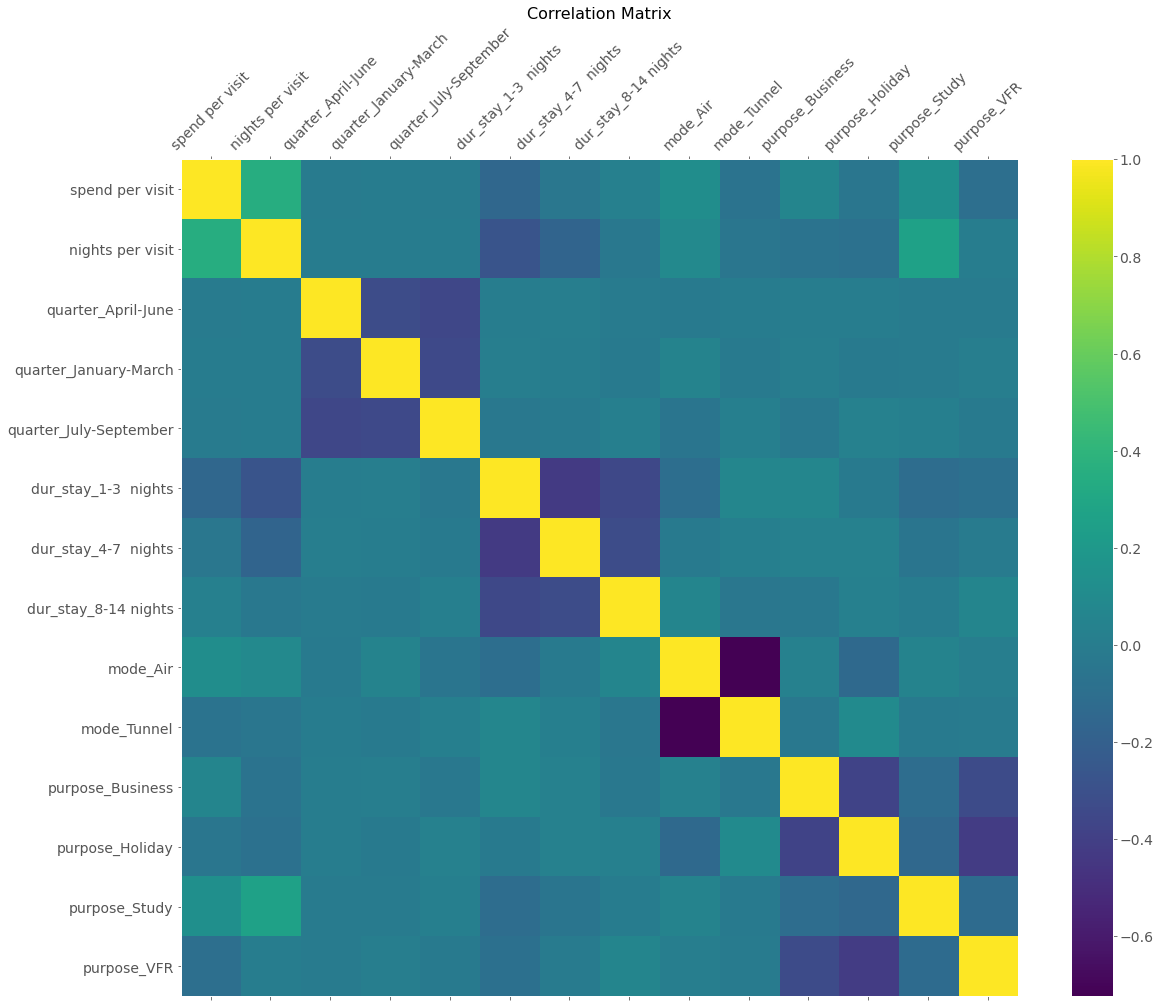

In [25]:
df = visit_final
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [28]:
visit_Q = visit_numeric.loc[:,['spend per visit', 'quarter_January-March', 'quarter_April-June', 'quarter_July-September', 'quarter_October-December']]

In [26]:
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [31]:
visit_Q_new = drop_column_using_vif_(visit_Q.drop('spend per visit', axis=1))

Dropping: quarter_January-March


/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [32]:
# using VIF on the bike_rental dataset

df_predictors_selected_VIF = drop_column_using_vif_(visit_final.drop('spend per visit', axis=1))
# Note that there is a 'while' loop in the drop_column_using_vif_. In each iteration, one variable is dropped.
print("The columns remaining after VIF selection are:")
print(df_predictors_selected_VIF.columns)

The columns remaining after VIF selection are:
Index(['nights per visit', 'quarter_April-June', 'quarter_January-March',
       'quarter_July-September', 'dur_stay_1-3  nights',
       'dur_stay_4-7  nights', 'dur_stay_8-14 nights', 'mode_Air',
       'mode_Tunnel', 'purpose_Business', 'purpose_Holiday', 'purpose_Study',
       'purpose_VFR'],
      dtype='object')


In [33]:
model_visit = sm.OLS(endog=visit_final[['spend per visit']], exog=sm.add_constant(df_predictors_selected_VIF)).fit()
model_visit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        spend per visit   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     827.0
Date:                Thu, 02 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:42:34   Log-Likelihood:            -5.5328e+05
No. Observations:               61462   AIC:                         1.107e+06
Df Residuals:                   61448   BIC:                         1.107e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    477.9647     44.705     10.692      0.000     390.343     565.587
nights per visit          32.7622      0.485     67.534      0.000      31.811      33.713
quarter_April-June       -48.8532     22.736     -2.149      0.032     -93.416      -4.290
quarter_January-March    -54.5142     22.966     -2.374      0.018     -99.527      -9.501
quarter_July-September   -65.0017     22.311     -2.913      0.004    -108.732     -21.271
dur_stay_1-3  nights    -302.0906     28.218    -10.705      0.000    -357.399    -246.782
dur_stay_4-7  nights     -61.1106     27.652     -2.210      0.027    -115.309      -6.912
dur_stay_8-14 nights      61.0193     28.075      2.173      0.030       5.993     116.046
mode_Air                 503.7810     27.287     18.462      0.000     450.298     557.264
mode_Tunnel              175.4118     33.018      5.313      0.000     110.696     240.127
purpose_Business         171.5333     27.057      6.340      0.000     118.502     224.565
purpose_Holiday         -187.9984     25.966     -7.240      0.000    -238.893    -137.104
purpose_Study            288.3982     46.698      6.176      0.000     196.869     379.927
purpose_VFR             -520.1437     26.569    -19.577      0.000    -572.218    -468.069
==============================================================================
Omnibus:                   148790.616   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       4661062439.930
Skew:                          24.924   Prob(JB):                         0.00
Kurtosis:                    1351.181   Cond. No.                         183.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

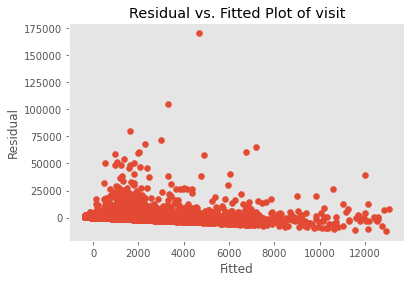

In [34]:
# plot 
plt.scatter(model_visit.fittedvalues, model_visit.resid)
# adding title and labels
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of visit')
plt.show()

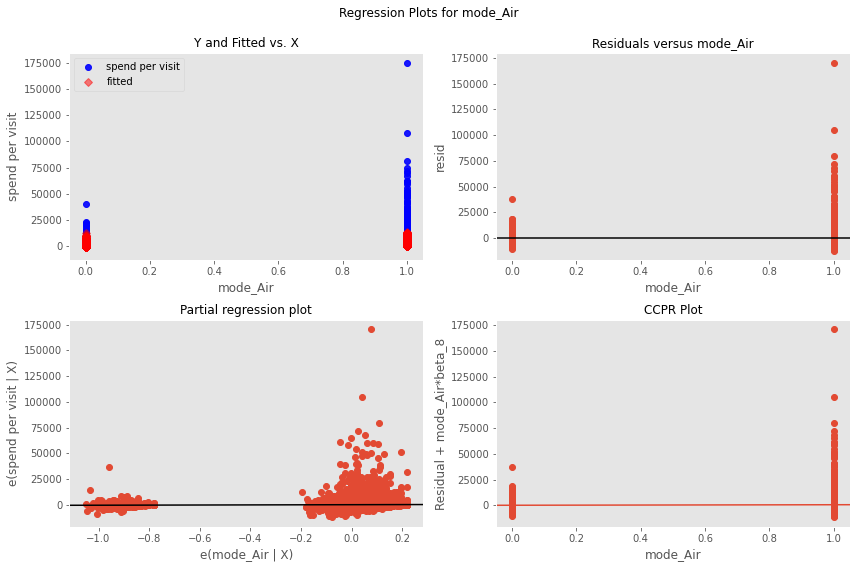

In [38]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_visit, 'mode_Air', fig=fig)

/opt/conda/envs/sds2021/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


------------------------------------------
Print the model:
nights per visit : 0.04646910297843421
quarter_April-June : -0.16738848260376965
quarter_January-March : -0.2242665025029906
quarter_July-September : -0.19009432512239088
dur_stay_1-3  nights : -0.8952268085861257
dur_stay_4-7  nights : 0.21617758393750314
dur_stay_8-14 nights : 0.27424824224080735
mode_Air : 2.020406784015902
mode_Tunnel : 0.9450843455088458
purpose_Business : 1.3081402372075102
purpose_Holiday : 0.5117943871563821
purpose_Study : 0.49520785728568545
purpose_VFR : -0.5098474612227725
------------------------------------------
Accuracy of the model is: 0.7301422016855944
The confusion matrix is:


/opt/conda/envs/sds2021/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

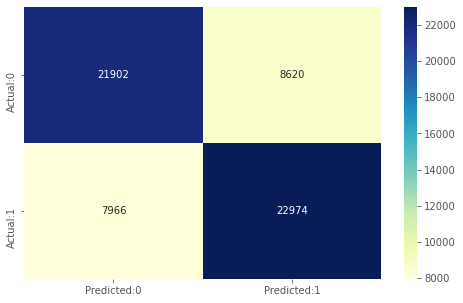

In [40]:
# If daily rental is larger than 4500, it is of Class 'True'. Otherwise, it is in Class 'False'.
threshold_visit = 470

X = df_predictors_selected_VIF
y = visit_final[['spend per visit']] > threshold_visit
###################

logreg = LogisticRegression()
logreg.fit(X, y)
y_pred=logreg.predict(X)

# print the coefficient in the model
print("------------------------------------------")
print("Print the model:")
coef_dict = {}
for coef, feat in zip(logreg.coef_.flatten().tolist(),X.columns):
    coef_dict[feat] = coef
    print(feat, ":", coef)
print("------------------------------------------")
    
acc = sklearn.metrics.accuracy_score(y,y_pred)
print("Accuracy of the model is: " + str(acc))

# Another evaluation: confusion matrix
print("The confusion matrix is:")
cm=confusion_matrix(y,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")